In [ ]:
#libraries
import os
import tarfile
import urllib
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.model_selection import train_test_split
#downloading the data and extracting it 
DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml2/blob/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz?raw=true"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):            
  os.makedirs(housing_path, exist_ok=True)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)
housing = load_housing_data()

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing['ocean_proximity'].value_counts()  

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

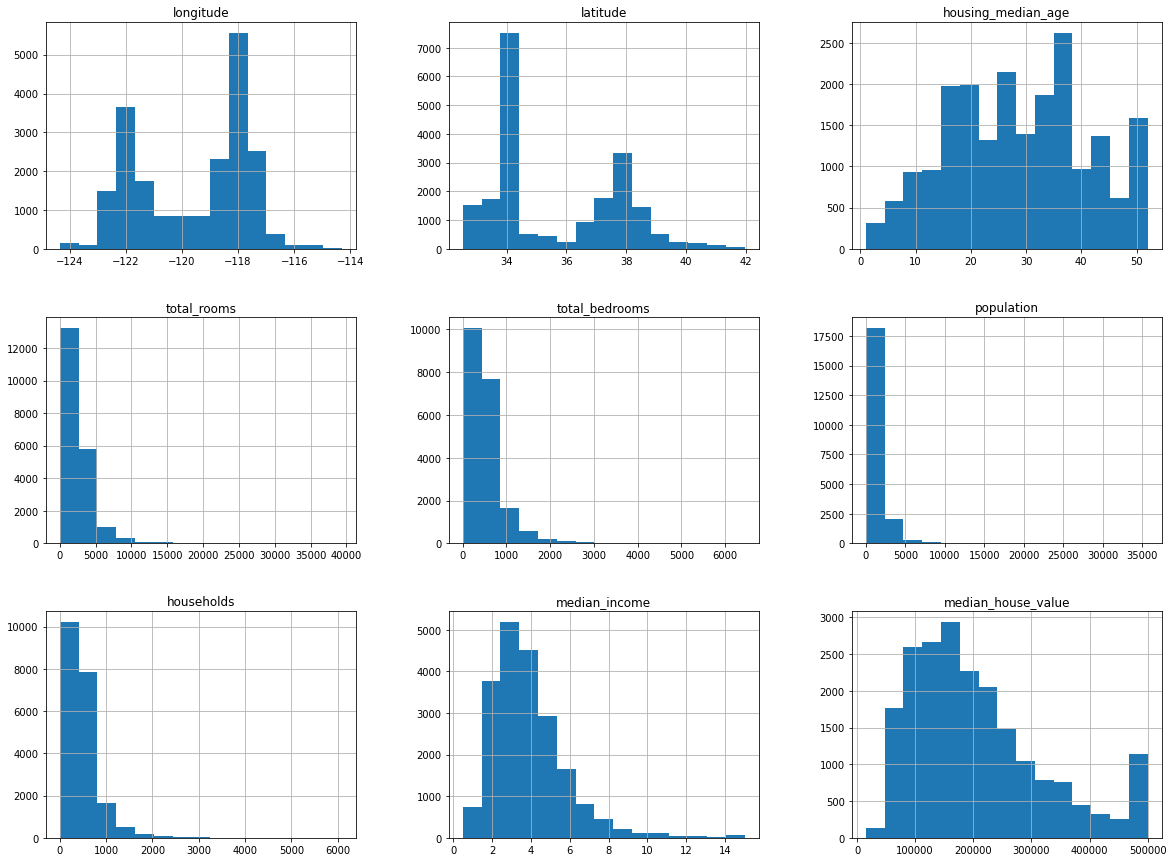

In [ ]:
housing.hist(bins=15, figsize=(20,15)) 
plt.show()


In [ ]:
housing.corr() # we notice that there's a high correlation between (households, total_rooms,	total_bedrooms,	population)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


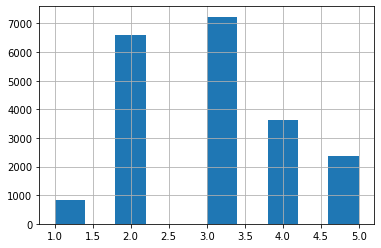

In [ ]:

housing["income_cat"] = pd.cut(housing["median_income"], #new column containing categories of incomes 
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])
housing['income_cat'].hist()


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit                            #statified split of data => a better representation of the data while training 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
   strat_train_set = housing.loc[train_index]
   strat_test_set = housing.loc[test_index]

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set) 

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [ ]:
housing_train = strat_train_set.copy()

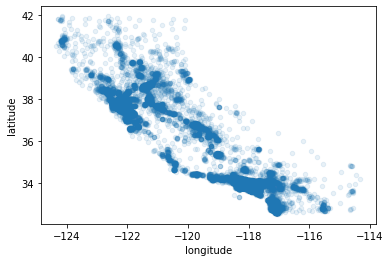

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) #lower alpha for a better visualization of the density 

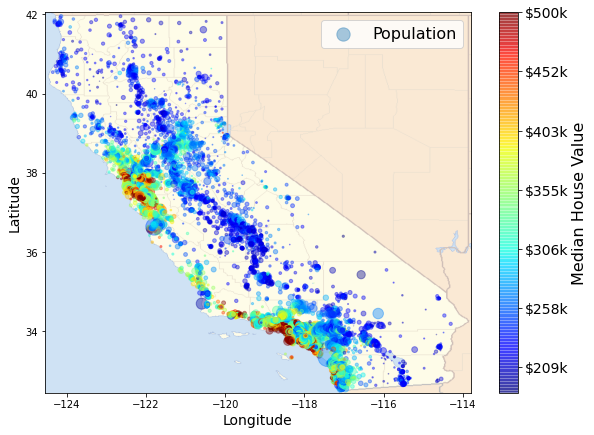

In [ ]:
# Download the California image
images_path = os.path.join('/content', "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd43728b650>,
      dtype=object)

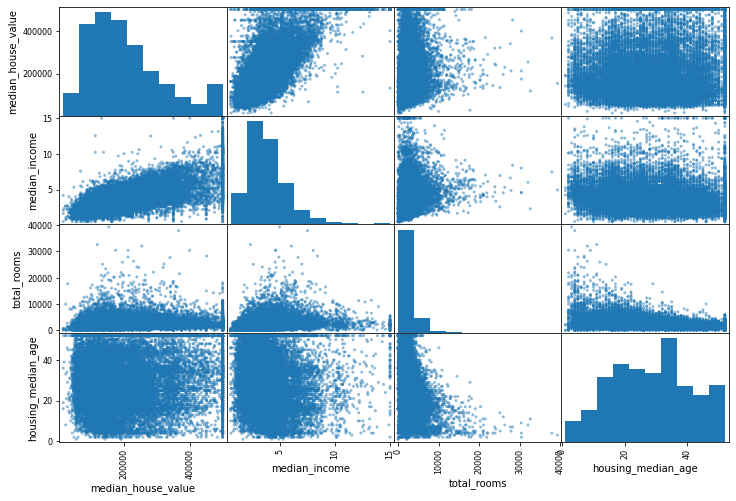

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

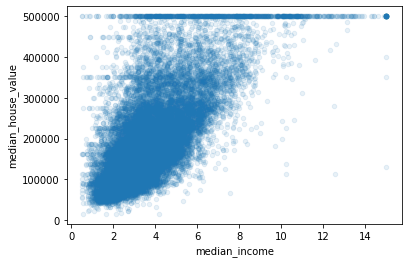

In [ ]:
#there seems to be a correlation between median_income and median_house_value
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

In [ ]:
#adding new features 
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [ ]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [ ]:
housing_labels = strat_train_set["median_house_value"].copy()
housing = strat_train_set.drop("median_house_value", axis=1)
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
 def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
  self.add_bedrooms_per_room = add_bedrooms_per_room
 def fit(self, X, y=None):
    return self # nothing else to do
 def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
    else:
     return np.c_[X, rooms_per_household, population_per_household] 
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
housing_cat = housing[["ocean_proximity"]]
housing_num = housing.drop("ocean_proximity", axis=1) 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
#training and evaluating 

In [ ]:
from sklearn.model_selection import cross_val_score #k_fold cross validation
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
scoring="neg_mean_squared_error", cv=10) #cross_val_score takes a utility function as a parameter hence the neg _mean_squared_error
tree_rmse_scores = np.sqrt(-scores) #hence the -scores
def display_scores(scores):
   print("Scores:", scores)
   print("Mean:", scores.mean())
   print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)
print('\n-----------------------------------------\n')
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
scoring="neg_mean_squared_error", cv=10) #cross_val_score takes a utility function as a parameter hence the neg_mean_squared_error
tree_rmse_scores = np.sqrt(-scores) #hence the -scores
def display_scores(scores):
   print("Scores:", scores)
   print("Mean:", scores.mean())
   print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)     #clearly overfitting 
print('\n-----------------------------------------\n')
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)


Scores: [71523.78333874 64044.46774989 67454.97869698 68514.10137273
 66303.62531226 72166.63405138 74464.08841381 68570.11804395
 66063.64175868 69870.86192291]
Mean: 68897.63006613276
Standard deviation: 3002.746127534861

-----------------------------------------

Scores: [71080.84066303 70992.65392063 68782.12701286 71682.8280913
 67435.95256179 78245.6499012  69922.22020949 73293.90062103
 68334.24692735 71826.0689641 ]
Mean: 71159.64888727812
Standard deviation: 2907.7658372240066

-----------------------------------------

Scores: [51553.65292335 48797.89565614 47005.23947642 52046.73567245
 47700.78025873 51824.08544879 52582.59165129 49949.79025967
 48680.25622229 54019.67674791]
Mean: 50416.070431704204
Standard deviation: 2201.612779754884


In [ ]:
from sklearn.model_selection import GridSearchCV  
#search through the deffined parameters and hyperparameters to find the best combination
#fine when having few plausibly good combinations
#when the both the computing power is availble and the search space is large 
#it is better to use a randomized search

param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3,4]},]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
#randomized search (commented because it needs heavy calculation)
"""from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)"""

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

64766.08369040825 {'max_features': 2, 'n_estimators': 3}
55664.8190300369 {'max_features': 2, 'n_estimators': 10}
53411.17021377862 {'max_features': 2, 'n_estimators': 30}
61423.04261654922 {'max_features': 4, 'n_estimators': 3}
53189.834926217205 {'max_features': 4, 'n_estimators': 10}
51325.59417606132 {'max_features': 4, 'n_estimators': 30}
60694.738782823166 {'max_features': 6, 'n_estimators': 3}
53178.65133752074 {'max_features': 6, 'n_estimators': 10}
51115.43987120438 {'max_features': 6, 'n_estimators': 30}
59238.73547607861 {'max_features': 8, 'n_estimators': 3}
52791.795010769325 {'max_features': 8, 'n_estimators': 10}
50619.70248288417 {'max_features': 8, 'n_estimators': 30}
62239.84079796323 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54739.634487052506 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60207.707727575435 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53427.99345945467 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [ ]:
from sklearn.metrics import mean_squared_error
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test) # testing data
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47956.42205994408

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"] #Access the fitted transformer by name.
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3107031226781911, 'median_income'),
 (0.14562768563889245, 'INLAND'),
 (0.1086817330527706, 'pop_per_hhold'),
 (0.09303731284914872, 'income_cat'),
 (0.06678044760302759, 'longitude'),
 (0.05927061236041398, 'latitude'),
 (0.04922347179833989, 'bedrooms_per_room'),
 (0.044403517167807646, 'housing_median_age'),
 (0.041631689522076784, 'rooms_per_hhold'),
 (0.01619733422075075, 'total_bedrooms'),
 (0.015934345779711638, 'total_rooms'),
 (0.01561184257684723, 'population'),
 (0.014879835728811968, 'households'),
 (0.009688325363666416, '<1H OCEAN'),
 (0.004506030171187284, 'NEAR BAY'),
 (0.003697790482951721, 'NEAR OCEAN'),
 (0.00012490300540430498, 'ISLAND')]